# An exploratory data analysis of Spotify songs and playlists  
  
***
  
## 1. Introduction  
  
In this notebook we will explore the "19,000 Spotify Songs" dataset available on [Kaggle](https://www.kaggle.com/edalrami/19000-spotify-songs).
It is mostly an excuse to try [pandas-profiling](https://pandas-profiling.github.io/pandas-profiling/docs/) on a dataset of a few thousands observations, and carry on the EDA after that. Pandas-profiling is a library that generates (and export) html EDA reports automatically. 

No information is provided about it's origin, the variables, etc. But as the name of the dataset suggest, it's very likely the data comes originally from the Spotify API. The variable descriptions below who are available on the [Spotify API documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) correspond almost perfectly to the dataset's variables.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Introduction</a></span></li><li><span><a href="#2.-Data-cleansing" data-toc-modified-id="2.-Data-cleansing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Data cleansing</a></span><ul class="toc-item"><li><span><a href="#2.1.-Data-import,-merge-and-a-rapid-first-look" data-toc-modified-id="2.1.-Data-import,-merge-and-a-rapid-first-look-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1. Data import, merge and a rapid first look</a></span></li><li><span><a href="#2.2.-Dealing-with-categorical-variables" data-toc-modified-id="2.2.-Dealing-with-categorical-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2. Dealing with categorical variables</a></span></li></ul></li><li><span><a href="#3.-EDA" data-toc-modified-id="3.-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. EDA</a></span><ul class="toc-item"><li><span><a href="#3.1.-Variables-description-+-some-comments-on-the-data" data-toc-modified-id="3.1.-Variables-description-+-some-comments-on-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1. Variables description + some comments on the data</a></span></li><li><span><a href="#3.2.-Auto-EDA" data-toc-modified-id="3.2.-Auto-EDA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2. Auto EDA</a></span></li><li><span><a href="#3.3.-A-look-at-the-relations-between-variables" data-toc-modified-id="3.3.-A-look-at-the-relations-between-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3.3. A look at the relations between variables</a></span></li><li><span><a href="#3.4.-A-focus-on-playlists" data-toc-modified-id="3.4.-A-focus-on-playlists-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>3.4. A focus on playlists</a></span></li></ul></li><li><span><a href="#4.-What's-next?" data-toc-modified-id="4.-What's-next?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. What's next?</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pandas-profiling is an Auto EDA library that generats html reports (inside Jupyter Notebooks and exportable)
# (installed via conda)
# https://pandas-profiling.github.io/pandas-profiling/docs/
from pandas_profiling import ProfileReport

***  

## 2. Data cleansing
### 2.1. Data import, merge and a rapid first look

In [2]:
#open the 2 csv files
song_info = pd.read_csv("Spotify19000/song_info.csv")
song_data = pd.read_csv("Spotify19000/song_data.csv")

Now a rapid look at the two .csv files:

In [3]:
song_info.head()

song_name            artist_name  \
0  Boulevard of Broken Dreams              Green Day   
1                  In The End            Linkin Park   
2           Seven Nation Army      The White Stripes   
3                  By The Way  Red Hot Chili Peppers   
4           How You Remind Me             Nickelback   

                          album_names          playlist  
0  Greatest Hits: God's Favorite Band  00s Rock Anthems  
1                       Hybrid Theory  00s Rock Anthems  
2                            Elephant  00s Rock Anthems  
3         By The Way (Deluxe Version)  00s Rock Anthems  
4                      Silver Side Up  00s Rock Anthems

In [4]:
print('Song duplicates (total):', np.count_nonzero(song_info.duplicated(subset='song_name',keep=False)))
print('Artist duplicates (total):', np.count_nonzero(song_info.duplicated(subset='artist_name',keep=False)))
song_info.describe()

Song duplicates (total): 8661
Artist duplicates (total): 14381


song_name artist_name    album_names          playlist
count      18835       18835          18835             18835
unique     13070        7564          12014               300
top       Better  Kanye West  Greatest Hits  Off the Strength
freq          21          82             66               100

Some songs appear on multiple playlists.  
More than half of the artists appear multiple times in the dataset.

In [5]:
song_data = song_data.drop(['song_name'], axis=1)
song_data.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256               4          0.370  
2  123.881               4          0.324  
3  122.444               4          0.198  
4  172.011               4          0.574

In [6]:
song_data.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [7]:
# merge the 2 dataframes
df = pd.concat([song_info, song_data], axis=1)
df

song_name            artist_name  \
0      Boulevard of Broken Dreams              Green Day   
1                      In The End            Linkin Park   
2               Seven Nation Army      The White Stripes   
3                      By The Way  Red Hot Chili Peppers   
4               How You Remind Me             Nickelback   
...                           ...                    ...   
18830              Let It Breathe            Water Liars   
18831                     Answers        Brooke Annibale   
18832      Sudden Love (Acoustic)          The Woodlands   
18833           Gentle on My Mind           Robert Ellis   
18834                    Up to Me           Sera Cahoone   

                              album_names                   playlist  \
0      Greatest Hits: God's Favorite Band           00s Rock Anthems   
1                           Hybrid Theory           00s Rock Anthems   
2                                Elephant           00s Rock Anthems   
3             By The Way (Deluxe Version)           00s Rock Anthems   
4                          Silver Side Up           00s Rock Anthems   
...                                   ...                        ...   
18830                         Water Liars  Your Favorite Coffeehouse   
18831                     The Simple Fear  Your Favorite Coffeehouse   
18832                  Parallels, Vol. II  Your Favorite Coffeehouse   
18833                           Dear John  Your Favorite Coffeehouse   
18834                            Up to Me  Your Favorite Coffeehouse   

       song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18830               60            159645      0.893000         0.500   0.151   
18831               60            205666      0.765000         0.495   0.161   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0              0.000029    8    0.0589    -4.095           1       0.0294   
1              0.000000    3    0.1080    -6.407           0       0.0498   
2              0.447000    0    0.2550    -7.828           1       0.0792   
3              0.003550    0    0.1020    -4.938           1       0.1070   
4              0.000000   10    0.1130    -5.065           1       0.0313   
...                 ...  ...       ...       ...         ...          ...   
18830          0.000065   11    0.1110   -16.107           1       0.0348   
18831          0.000001   11    0.1050   -14.078           0       0.0301   
18832          0.000000    0    0.1250   -12.222           1       0.0355   
18833          0.015700    3    0.1190   -12.020           1       0.0328   
18834          0.000254    4    0.1040   -11.790           1       0.0302   

         tempo  time_signature  audio_valence  
0      167.060               4          0.474  
1      105.256               4          0.370  
2      123.881               4          0.324  
3      122.444               4          0.198  
4      172.011               4          0.574  
...        ...             ...            ...  
18830  113.969               4          0.300  
18831   94.286               4          0.265  
18832  130.534               4          0.286  
18833  106.063               4          0.323  
18834   91.490          

### 2.2. Dealing with categorical variables

In [8]:
# Setting categorical variables
df.key = df.key.astype('category')
df.audio_mode = df.audio_mode.astype('category')
df.time_signature = df.time_signature.astype('category')

# Renaming categories to easier interpretables names
###df.key = df.key.cat.rename_categories(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
###df.audio_mode = df.audio_mode.cat.rename_categories(['Minor', 'Major'])
# ------> Out of code because the Auto-EDA library ignores the object (character) variables 

# Note: no renaming of time_signature, as the original encoding makes it impossible to attribute meaningful categories with certainty; cf. variable description below

# Rescaling song_popularity
df.song_popularity = df.song_popularity.div(100)

df.dtypes

song_name             object
artist_name           object
album_names           object
playlist              object
song_popularity      float64
song_duration_ms       int64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
audio_mode          category
speechiness          float64
tempo                float64
time_signature      category
audio_valence        float64
dtype: object

***
  
## 3. EDA

### 3.1. Variables description + some comments on the data  
  
  
Variable descriptions come from the Spotify API documentation ( (https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/))
  
  
**song_name** :  
`We already know that some songs appear on multiple playlists.`
  

**artist_name** :  
`More than half of the artists appear multiple times in the dataset.`
  
  
**album_names** :  
  
  
**playlist** :  
`No information on the playlist selection has been given. We can only note a variety of genres, "moods" playlists (chill, workout, etc) and decade specific playlists (00's, 70's, etc). However, the language of the songs seems to be almost only english or spanish. It's very likely that the selection of those playlists is human made, therefor biased.`
  
  
**song_popularity** : "The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently."  
`We don't know when the data has been gathered. But it has been posted on Kaggle the 23/11/2018. We will rescale this variable on a 0 to 1 scale.`  
`The popularity of the songs over the dataset is propably biased in some way.`
  
  
**song_duration_ms** :  "The duration of the track in milliseconds."
  
  
**acousticness** : "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
  
  
**danceability** :  "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."
  
  
**energy** : "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

**instrumentalness** : "Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."  
`38% of strict 0 in the dataset, but it simply mean a strong confidence in the presence of vocals.`
  
  
**key** : "The estimated overall key of the section. The values in this field ranging from 0 to 11 mapping to pitches using standard Pitch Class notation (E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on). If no key was detected, the value is -1."  
`No song with undetected key in the dataset`
  
  
**liveness** : "Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."
  
  
**loudness** : "The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db."
  
  
**audio_mode** : "Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. This field will contain a 0 for “minor”, a 1 for “major”, or a -1 for no result. Note that the major key (e.g. C major) could more likely be confused with the minor key at 3 semitones lower (e.g. A minor) as both keys carry the same pitches."  
`Majority of songs in major.`
  
  
**speechiness** : "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."
  
  
**tempo** : "The overall estimated tempo of the section in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."
  
  
**time_signature** : "An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”."  
`In our dataset the range differs (0, 1, 3, 4 and 5), making it hard to interpret. I presume 4 still correspond to a 4/4 signature, and 3 to 3/4 judging by the distribution and the popularity of those time signatures in modern music. It is however impossible to link 5/4, 6/4 and 7/4 with enough certainty.`
  
  
**audio_valence** : "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."


### 3.2. Auto EDA

**Note:** I won't remove any duplicate from the EDA because my endgoal is to focus on playlists. Having those same observations on different playlists is actually some important information to have, and removing duplicates won't affect every playlist the same way.  
I also don't want to make the EDA too long and heavy by redoing everything EDA related using only unique songs.  
  
However we need to keep in mind that **multiple occurences of a song often mean a higher popularity**, and particulary over 3 occurences. We can this this on the folling scatterplot:

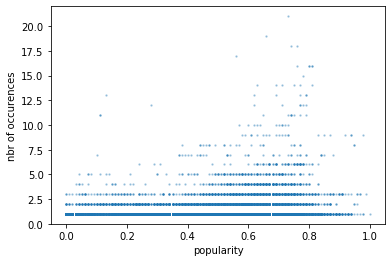

In [9]:
#counting the occurences of each song, and creating a DataFrame to plot a scatterplot
df_cleaned = df.drop_duplicates(subset='song_name', keep='first')
df_cleaned = df_cleaned[['song_popularity']].reset_index(drop=True)
duplicate_count = df['song_name'].value_counts().reset_index(drop=True)
popdf = pd.concat([duplicate_count, df_cleaned], axis=1)

#scatterplot: song popularity vs. occurences of each song
plt.scatter(x=popdf['song_popularity'],y=popdf['song_name'], s=2, alpha= 0.3)
plt.xlabel("popularity")
plt.ylabel("nbr of occurences")
plt.show()

Now to the auto-EDA:

In [10]:
#Automatically generates a html report
ProfileReport(df)

C:\Users\Nicolas\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


A few observations from the Auto EDA:  
  
- ~ 90% of the songs lie **between 2min30 and 5min**.  
  
- Dataset is **mostly non acoustic**.  
  
- The **energy and loudness** are quite **high** for most of the songs.
  
- There is almost **no instrumental songs** in the dataset.  
  
- Songs are **mostly in a major mode**.  
  
- There is almost no track with only speech on it.  
  
- More than 90% of the songs lie **between 75 and 175 bpm**.  
  
- **4/4** is the **most common** time signature (~ 95%), then 3/4 (~ 4%).  
  

### 3.3. A look at the relations between variables
  


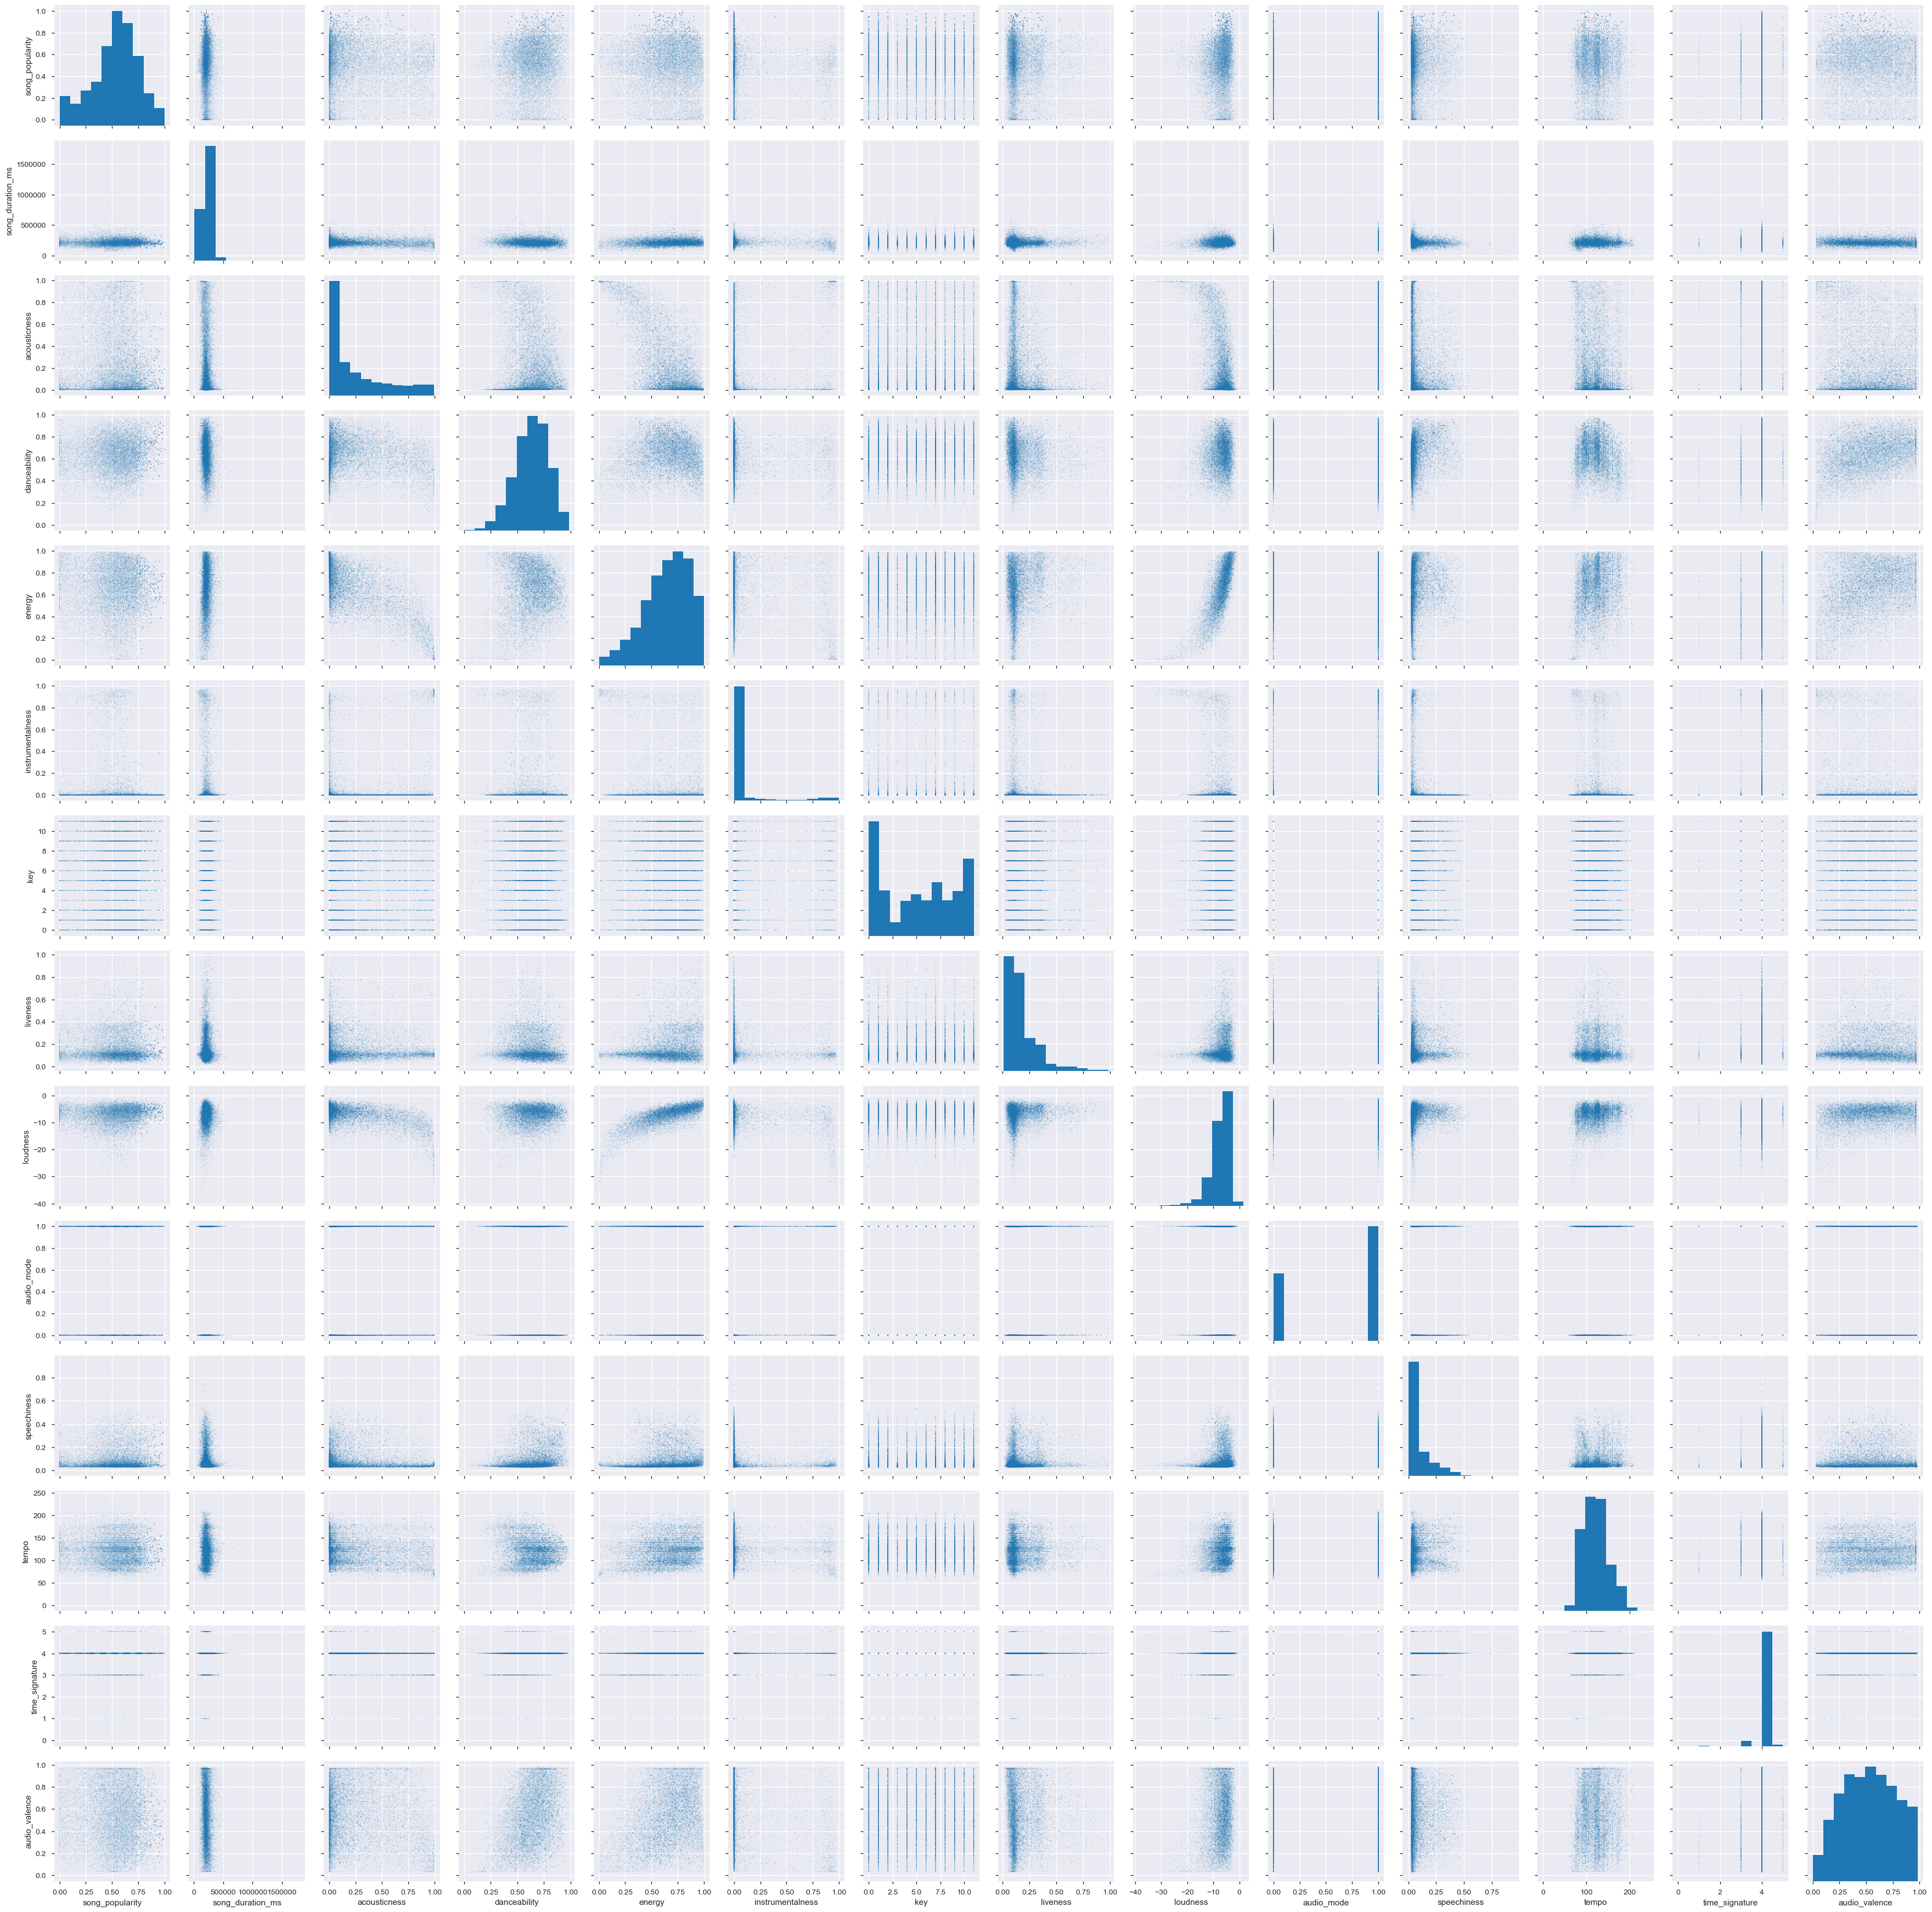

In [11]:
# Plot a matrix of scatterplots for each feature 1on1, distribution of the variables in the diagonal 
sns.pairplot(df, plot_kws={'alpha':'0.15', 's': 1, 'edgecolor':'None'})
plt.show()

From the correlation matrix of the EDA and its most important coefficients, we can see that:  
- loundness and energy are strongly correlated
- acousticness is negatively correlated with loudness and energy
- positive correlation between the positivity (valence) of the song, it's danceability and it's energy
- insturmentalness is negatively correlated with loudness  
  
From the pairplot just above, we can see that:  
- the relations observed in the correlation matrix have distinc shapes  
- a (potential small) cluster of songs with high acousticness and instrumentalness  


### 3.4. A focus on playlists



In [12]:
playlist_stats = df.groupby("playlist").describe()
playlist_stats

song_popularity                                    \
                                    count      mean       std   min     25%   
playlist                                                                      
00s Rock Anthems                     60.0  0.676167  0.154789  0.11  0.6475   
100% LatinX                          59.0  0.618136  0.178938  0.37  0.4600   
2000s Smash Hits                     80.0  0.711875  0.109522  0.10  0.6775   
50 Latin Classics                    50.0  0.540800  0.198308  0.04  0.5000   
60s Rock Anthems                    100.0  0.585700  0.151065  0.08  0.5275   
...                                   ...       ...       ...   ...     ...   
Workout Twerkout                     49.0  0.654898  0.189573  0.05  0.5900   
You & Me                            100.0  0.418300  0.232649  0.00  0.3025   
Young & Free                        100.0  0.578100  0.127657  0.23  0.5000   
Your Favorite Coffeehouse           100.0  0.571900  0.158488  0.22  0.5675   
mint                                 50.0  0.611600  0.190449  0.08  0.5525   

                                               song_duration_ms  \
                             50%     75%   max            count   
playlist                                                          
00s Rock Anthems           0.710  0.7700  0.81             60.0   
100% LatinX                0.590  0.7500  0.98             59.0   
2000s Smash Hits           0.740  0.7700  0.85             80.0   
50 Latin Classics          0.580  0.6675  0.84             50.0   
60s Rock Anthems           0.625  0.6925  0.81            100.0   
...                          ...     ...   ...              ...   
Workout Twerkout           0.680  0.7500  0.95             49.0   
You & Me                   0.490  0.5800  0.79            100.0   
Young & Free               0.580  0.6600  0.89            100.0   
Your Favorite Coffeehouse  0.630  0.6700  0.79            100.0   
mint                       0.635  0.7000  1.00             50.0   

                                          ...      tempo           \
                                    mean  ...        75%      max   
playlist                                  ...                       
00s Rock Anthems           230436.116667  ...  154.40800  189.931   
100% LatinX                203059.152542  ...  132.67800  185.502   
2000s Smash Hits           232062.200000  ...  142.29100  193.437   
50 Latin Classics          249706.580000  ...  143.39200  193.538   
60s Rock Anthems           208866.780000  ...  141.03775  201.583   
...                                  ...  ...        ...      ...   
Workout Twerkout           191980.591837  ...  153.98300  203.911   
You & Me                   243357.860000  ...  143.27800  193.356   
Young & Free               204044.100000  ...  127.33550  196.015   
Your Favorite Coffeehouse  211958.700000  ...  132.37300  187.229   
mint                       212761.680000  ...  127.71875  174.074   

                          audio_valence                                       \
                                  count      mean       std     min      25%   
playlist                                                                       
00s Rock Anthems                   60.0  0.490623  0.215441  0.0824  0.33000   
100% LatinX                        59.0  0.575288  0.209622  0.1290  0.42750   
2000s Smash Hits                   80.0  0.583640  0.228530  0.0992  0.43375   
50 Latin Classics                  50.0  0.770660  0.195997  0.2640  0.70275   
60s Rock Anthems                  100.0  0.639199  0.224238  0.0329  0.48825   
...                                 ...       ...       ...     ...      ...   
Workout Twerkout                   49.0  0.491143  0.234722  0.0930  0.30200   
You & Me                          100.0  0.322640  0.189153  0.0377  0.17000   
Young & Free                      100.0  0.451840  0.193510  0.1090  0.30050   
Your Favorite Coffeehouse         100.0  0.331181  0.

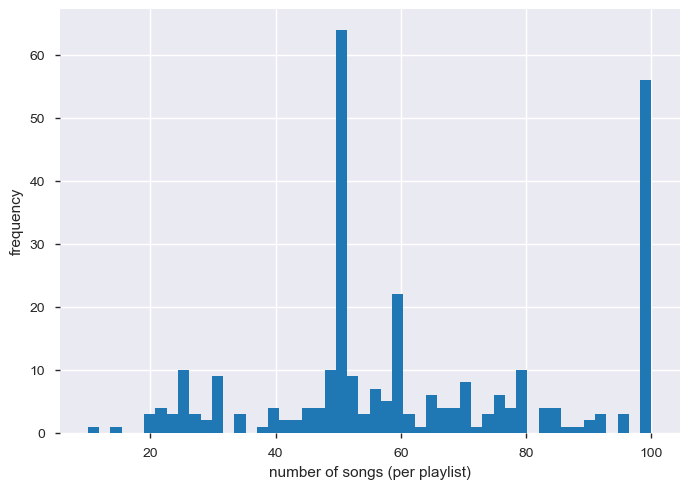

In [13]:
# histogram of number of songs per playlist
plt.hist(playlist_stats.loc[:, ('song_popularity', 'count')], bins= 50)
plt.xlabel('number of songs (per playlist)')
plt.ylabel('frequency')
plt.show()

There are many playlists made of either 50 or 100 songs exactly. We can see a thrid smaller frequency peak of playlist of 60 songs.  
  

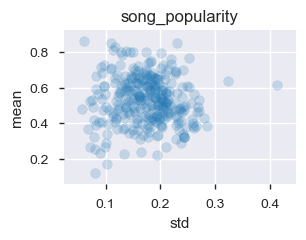

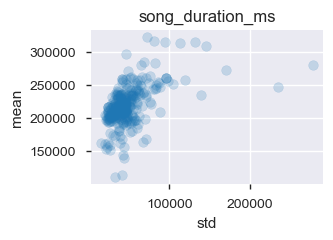

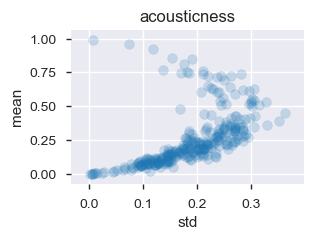

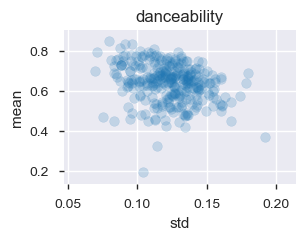

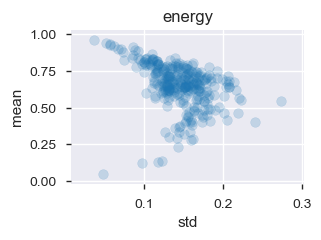

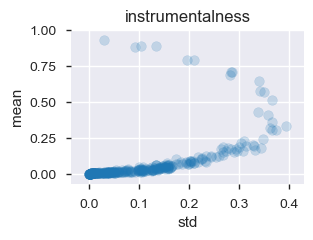

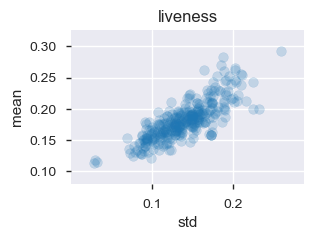

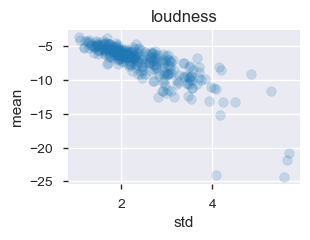

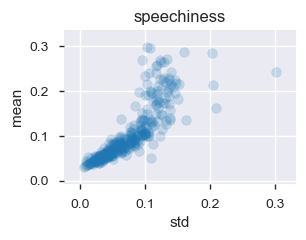

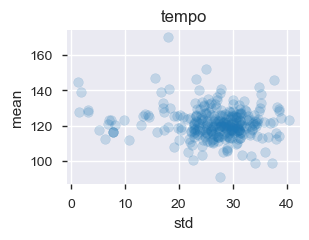

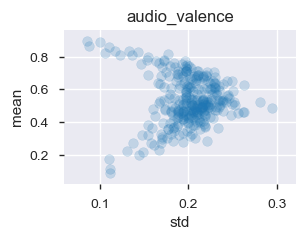

In [14]:
# plot the mean and standard deviation of each playlist, for each feature
for i in playlist_stats.columns.levels[0]:
    plt.figure(figsize=(3, 2))
    plt.scatter(x=playlist_stats.loc[:, (i, 'std')],y=playlist_stats.loc[:, (i, 'mean')], alpha=0.2)
    plt.title(i)
    plt.xlabel("std")
    plt.ylabel("mean")
    plt.show()

We are searching for low standard deviation between songs of a playlist for a given feature, meaning the songs of this playlist have some similarities regarding the feature.  
The mean is helping to differentiate the playlists. Different means of a variable for different playlists is what we are looking for.  
  
* The average popularity of the songs seems to vary quite a lot between playlists, but with a variety of standard deviations.  
Some playlists contain mostly less popular songs, some contain mostly popular songs, some contain mostly average popular songs.  
But most playlists, even when having different means, also have a rather average or high standard deviation.  
That indicates a mix of popular and less popular songs inside most playsits.   
  
  
* Same observation for danceability. 
  
   
* A few playlists have almost only acoustic songs.
Most of the playlist have almost only non-acoustic songs.
The rather small differences of average acousticness between playlists might be due to non-meaningfull variations between songs of the acousticness confidence feature, or by extreme values inside playlists (a few acoustic songs in many playlists for instance), also increasing the std.  
A few playlists have only non-acoustic songs.
  
  
* A few playlists have almost only acoustic instrumental.
Most of the playlist have almost only non-instrumental songs.
The even smaller differences of instrumentalness (compare to acousticness deferences) can be explained in a similar way.  
  
  
* There are almost no live songs, the very small variation can be exlain by the exact same reasoning applied to the instrumentalness.  
  
  
* Looking at audio_valence: There are a few 'happy playlists' and a few 'sad playlist'. Most playlists have average hapiness, and ~ 0.2 std, indicating the presence of happy and sad songs in the playlist.  
  
  
* Regarding tempo, the few playlists having low std might indicade genre-specific playlists. Tempo is often specific to music genres.  
The rest of the playlist seems to have a variety of songs with differents BPM, judging by the std.  
  
  
* Looking energy: a few playlist are calm.  
The energy is quite high overall, with an average std indication some difference between songs inside playlists.  
Not having more details on how the indicator is made or even what it means doesn't help either.  
  
  
* The variation in average decibels (loudness) are extremly small. Loudness is something quite standardized in music production during mastering (or remastering).  
However, there are a few significantly less loud playlists.  
  
  
* Song duration is quite tricky to analyse. A few playlists have a higher average duration (>5min). Even fewer have a low average song duration(<2min30).  
A few playlists have a high std, but most of them have a std between 20 and 40sec.
  
  
* Speechiness isn't really relevent, as there are no songs containing only spoken words in the dataset.
  
***
   
## 4. What's next?
Playlists, or at least some of the playlists, are insightfull.  
  
Dimensionality reduction (PCA, t-SNE) or even clustering (k-prototype because of the mix of continous and categorical) could bring more insights on the dataset, or can be used as features for a playlist predictor.